In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr

In [ ]:
df = pd.read_excel('/content/Selected countries returns.xlsx')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India
0,2004-01-05,0.012319,0.010555,-0.000723,0.004321,0.003189,0.000687,0.005317,0.033164,0.047293,0.015675,-0.012393,0.002057
1,2004-01-06,0.001291,0.002788,-0.001033,-0.000114,-0.003462,-0.001796,0.004422,0.003926,0.001868,0.003222,0.010566,-0.015917
2,2004-01-07,0.002364,-0.001977,-0.005208,-0.007722,-0.009026,-0.007173,-0.016959,0.008022,-0.010918,-0.018214,0.001214,0.002249
3,2004-01-08,0.004951,-0.000250,0.007393,0.010194,0.008166,0.004728,0.011556,0.014338,0.016881,-0.001035,-0.001039,0.025117
4,2004-01-09,-0.008927,-0.004086,0.011687,-0.007257,-0.005003,-0.006227,-0.002257,-0.017960,0.008397,0.029764,0.006494,0.001807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,2025-05-23,-0.006729,0.001003,0.004710,-0.015520,-0.016673,-0.002324,-0.019597,-0.009458,0.004006,-0.004914,0.002174,-0.003299
5397,2025-05-27,0.020253,0.007484,0.005118,0.008241,-0.000171,0.006868,0.003406,-0.001839,0.010120,-0.007932,0.001325,0.005040
5398,2025-05-29,0.004003,-0.002777,0.018662,-0.004376,-0.001077,-0.001096,-0.003615,0.007017,-0.002552,0.013579,-0.005773,0.009456
5399,2025-06-03,0.004094,0.009566,-0.013746,0.003915,0.001540,0.001667,-0.000323,0.004319,0.003780,0.017391,-0.003619,-0.017665


In [ ]:
df.columns

Index(['Date', 'U.S.', 'Canada ', 'Japan', 'Germany', 'France', 'U.K.',
       'Italy', 'China', 'Brazil', 'Russia', 'South Africa', 'India'],
      dtype='object')

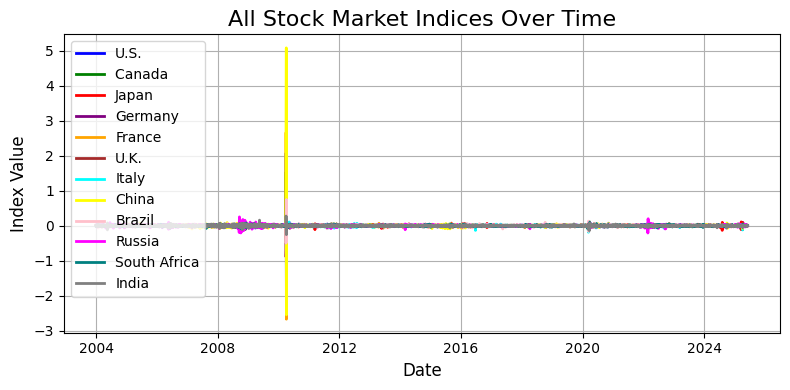

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and looks like this:
# Columns: ['Date', 'S&P 500', 'S&P_TSX', 'Nikkei 225', 'DAX', 'CAC 40', 'FTSE100', 'FTSE MIB']

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Create the plot
plt.figure(figsize=(8,4))

# Corrected column name: 'DAX' should be 'DAX' as shown in the df output
channel_columns = ['U.S.', 'Canada ', 'Japan', 'Germany', 'France', 'U.K.',
       'Italy', 'China', 'Brazil', 'Russia', 'South Africa', 'India']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan','yellow','pink','magenta','teal','gray','lime']

# Plot each index
for i, col in enumerate(channel_columns):
    plt.plot(df['Date'], df[col], label=col, color=colors[i], linewidth=2)

# Customize the plot
plt.title('All Stock Market Indices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Index Value', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# filtered_df = df[(df['Date'] > '2003-01-01') & (df['Date'] < '2023-01-01')]

In [ ]:
pre_returns = df.iloc[:,1:]
pre_returns

,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India
0,0.012319,0.010555,-0.000723,0.004321,0.003189,0.000687,0.005317,0.033164,0.047293,0.015675,-0.012393,0.002057
1,0.001291,0.002788,-0.001033,-0.000114,-0.003462,-0.001796,0.004422,0.003926,0.001868,0.003222,0.010566,-0.015917
2,0.002364,-0.001977,-0.005208,-0.007722,-0.009026,-0.007173,-0.016959,0.008022,-0.010918,-0.018214,0.001214,0.002249
3,0.004951,-0.000250,0.007393,0.010194,0.008166,0.004728,0.011556,0.014338,0.016881,-0.001035,-0.001039,0.025117
4,-0.008927,-0.004086,0.011687,-0.007257,-0.005003,-0.006227,-0.002257,-0.017960,0.008397,0.029764,0.006494,0.001807
...,...,...,...,...,...,...,...,...,...,...,...,...
5396,-0.006729,0.001003,0.004710,-0.015520,-0.016673,-0.002324,-0.019597,-0.009458,0.004006,-0.004914,0.002174,-0.003299
5397,0.020253,0.007484,0.005118,0.008241,-0.000171,0.006868,0.003406,-0.001839,0.010120,-0.007932,0.001325,0.005040
5398,0.004003,-0.002777,0.018662,-0.004376,-0.001077,-0.001096,-0.003615,0.007017,-0.002552,0.013579,-0.005773,0.009456
5399,0.004094,0.009566,-0.013746,0.003915,0.001540,0.001667,-0.000323,0.004319,0.003780,0.017391,-0.003619,-0.017665


In [ ]:
pre_returns.describe()

,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India
count,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000
mean,0.000333,0.000218,0.000301,0.000333,0.000213,0.000104,0.000078,0.001070,0.000348,0.000272,0.000362,0.000491
std,0.044235,0.033694,0.014182,0.013099,0.053044,0.028611,0.014839,0.086027,0.020717,0.018975,0.012980,0.014076
min,-2.326838,-1.768876,-0.132341,-0.130549,-2.671813,-0.893412,-0.185461,-2.545576,-0.496472,-0.207715,-0.104504,-0.254929
25%,-0.004146,-0.003980,-0.006304,-0.005360,-0.005784,-0.004668,-0.006493,-0.006082,-0.007866,-0.006751,-0.006292,-0.005206
50%,0.000812,0.000837,0.000748,0.001034,0.000773,0.000640,0.000901,0.000579,0.000692,0.000889,0.000888,0.000902
75%,0.005667,0.005175,0.007496,0.006815,0.006636,0.005385,0.007477,0.006876,0.009050,0.008246,0.007253,0.006846
max,2.075650,1.533125,0.109165,0.107975,2.666660,1.582673,0.108742,5.086002,0.748051,0.252261,0.090570,0.277321


In [ ]:
pre_returns.dtypes

,0
U.S.,float64
Canada,float64
Japan,float64
Germany,float64
France,float64
U.K.,float64
Italy,float64
China,float64
Brazil,float64
Russia,float64


In [ ]:
pre_returns.shape

(5401, 12)

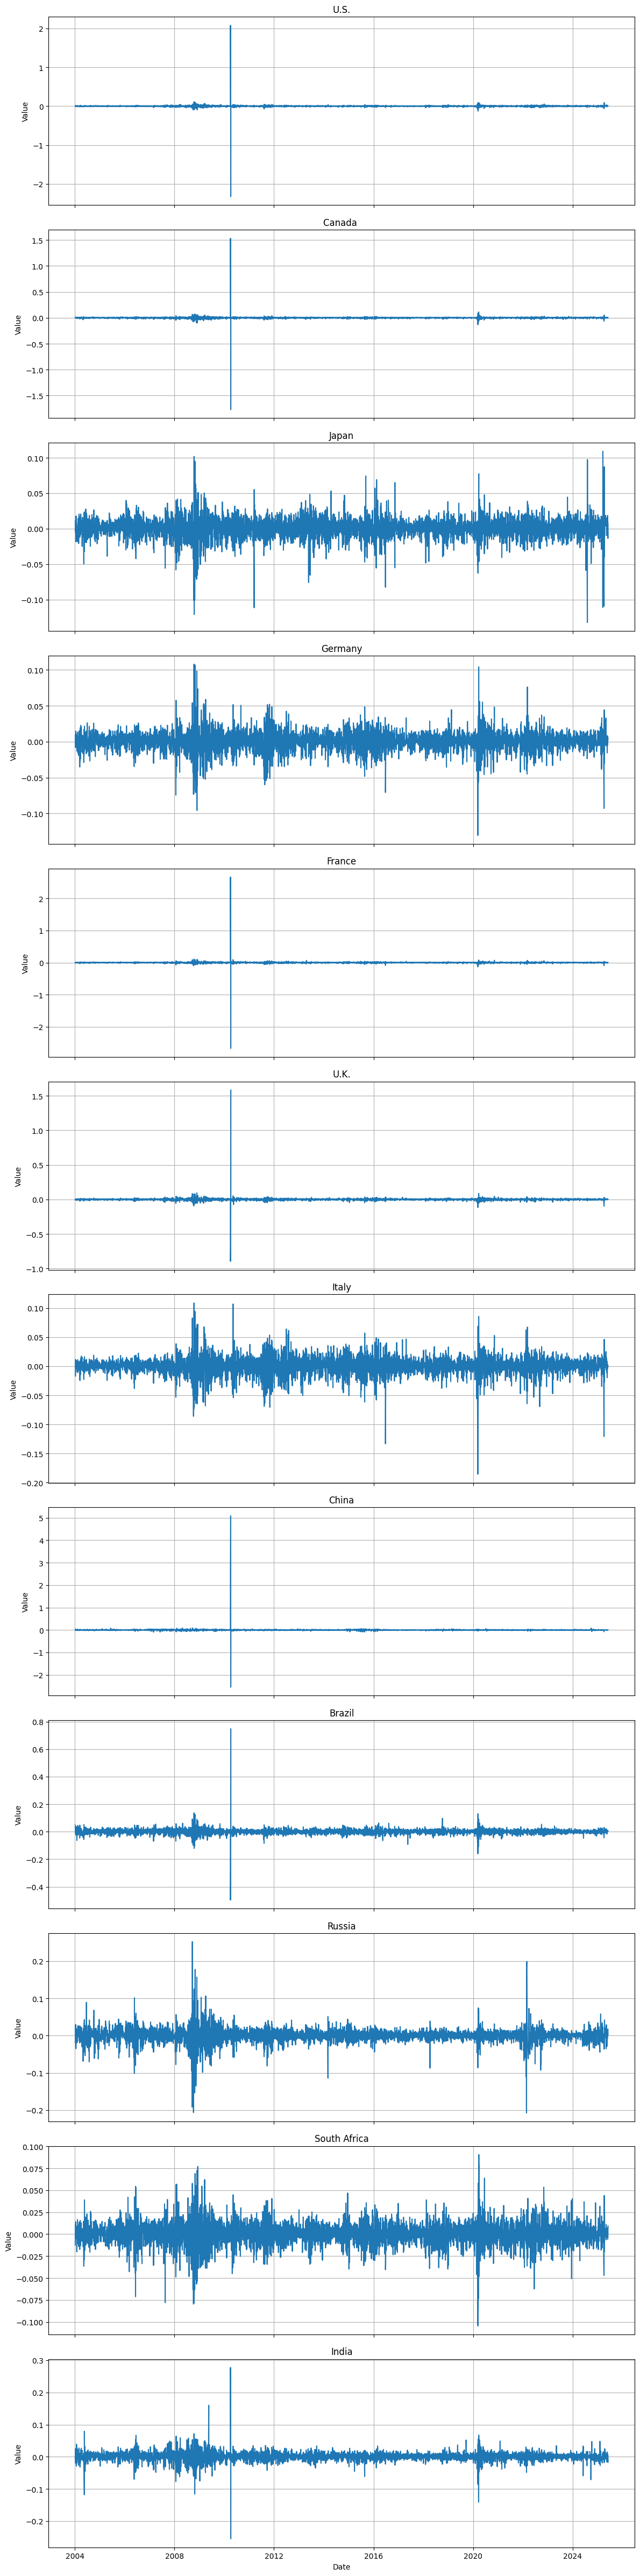

In [ ]:
# Select only numeric columns (excluding 'Date')
numeric_cols = [col for col in df.columns if col != 'Date' and np.issubdtype(df[col].dtype, np.number)]
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 4 * len(numeric_cols)), sharex=True)

# If there's only one numeric column, make axes iterable
if len(numeric_cols) == 1:
    axes = [axes]

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    axes[i].plot(df['Date'], df[col])
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

axes[-1].set_xlabel('Date')  # Only set x-axis label on the last subplot
plt.tight_layout()
plt.show()

In [ ]:
matrix = pre_returns.corr()
matrix

,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India
U.S.,1.000000,0.979271,0.051285,0.162434,0.966097,-0.779918,0.154291,0.614907,-0.445287,0.070030,0.095511,0.413730
Canada,0.979271,1.000000,0.077863,0.181631,0.958021,-0.760493,0.177454,0.621534,-0.414242,0.106909,0.135695,0.431135
Japan,0.051285,0.077863,1.000000,0.340843,0.091695,0.130672,0.299193,0.043760,0.142702,0.249343,0.336942,0.315996
Germany,0.162434,0.181631,0.340843,1.000000,0.232855,0.309767,0.834319,0.028783,0.356522,0.445488,0.575653,0.357548
France,0.966097,0.958021,0.091695,0.232855,1.000000,-0.724795,0.228767,0.560436,-0.467362,0.111613,0.140933,0.444279
U.K.,-0.779918,-0.760493,0.130672,0.309767,-0.724795,1.000000,0.289581,-0.724757,0.710495,0.186801,0.240440,-0.152470
Italy,0.154291,0.177454,0.299193,0.834319,0.228767,0.289581,1.000000,0.024464,0.341372,0.421102,0.527578,0.339241
China,0.614907,0.621534,0.043760,0.028783,0.560436,-0.724757,0.024464,1.000000,-0.441827,0.021411,0.037722,0.231697
Brazil,-0.445287,-0.414242,0.142702,0.356522,-0.467362,0.710495,0.341372,-0.441827,1.000000,0.262950,0.317438,0.010123
Russia,0.070030,0.106909,0.249343,0.445488,0.111613,0.186801,0.421102,0.021411,0.262950,1.000000,0.454467,0.292260


```
          +-----------------------+
          | Input: returns Series |
          +----------+------------+
                     |
                     v
        +------------+------------+
        | Copy returns into `sr`  |
        +------------+------------+
                     |
                     v
    +-------------------------------+
    | For i = 1 to len(returns)-1: |
    | sr[i] = 0.5 * (returns[i] -  |
    |                   returns[i-1]) |
    +-------------------------------+
                     |
                     v
  +-----------------------------------------------+
  | sr[0] = 0.5 * (returns[0] - returns[-1])       |
  | (apply circular boundary for first element)   |
  +----------------------------+------------------+
                                   |
                                   v
                     +-------------+--------------+
                     | Output: Transformed Series |
                     +----------------------------+
```


In [ ]:
def compute_wavelet_sr(returns, wavelet='haar'):
    """Compute Haar wavelet scaling returns with vectorized operations."""
    sr = returns.copy()
    # Vectorized difference
    sr.iloc[1:] = 0.5 * (returns.iloc[1:].values - returns.iloc[:-1].values)
    # Circular boundary for first element
    sr.iloc[0] = 0.5 * (returns.iloc[0] - returns.iloc[-1])
    return sr


In [ ]:
returns_sr = compute_wavelet_sr(pre_returns)

In [ ]:
returns_sr.shape

(5401, 12)

In [ ]:
returns_sr.isna().sum()

,0
U.S.,0
Canada,0
Japan,0
Germany,0
France,0
U.K.,0
Italy,0
China,0
Brazil,0
Russia,0


In [ ]:
returns_sr.head()

,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India
0,0.003268,0.005914,-0.004359,-0.000303,-0.002017,-0.000928,0.002079,0.014472,0.019996,0.007560,-0.010812,-0.000584
1,-0.005514,-0.003883,-0.000155,-0.002217,-0.003326,-0.001242,-0.000448,-0.014619,-0.022713,-0.006226,0.011480,-0.008987
2,0.000537,-0.002382,-0.002087,-0.003804,-0.002782,-0.002688,-0.010690,0.002048,-0.006393,-0.010718,-0.004676,0.009083
3,0.001293,0.000863,0.006300,0.008958,0.008596,0.005951,0.014258,0.003158,0.013899,0.008590,-0.001126,0.011434
4,-0.006939,-0.001918,0.002147,-0.008725,-0.006585,-0.005478,-0.006907,-0.016149,-0.004242,0.015399,0.003766,-0.011655


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is already loaded and looks like this:
# # Columns: ['Date', 'S&P 500', 'S&P_TSX', 'Nikkei 225', 'DAX', 'CAC 40', 'FTSE100', 'FTSE MIB']

# # Convert 'Date' column to datetime if it's not already
# df['Date'] = pd.to_datetime(df['Date'])

# # Create the plot
# plt.figure(figsize=(8,4))

# # Corrected column name: 'DAX' should be 'DAX' as shown in the df output
# channel_columns = ['S&P 500', 'S&P_TSX', 'Nikkei 225', 'DAX ', 'CAC 40', 'FTSE100', 'FTSE MIB']
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan']

# # Plot each index
# for i, col in enumerate(channel_columns):
#     plt.plot(df['Date'], returns_sr[col], label=col, color=colors[i], linewidth=2)

# # Customize the plot
# plt.title('All Stock Market Indices Over Time After wavelet decomposition', fontsize=16)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Index Value', fontsize=12)
# plt.legend(loc='upper left')
# plt.grid(True)
# plt.tight_layout()

# # Show plot
# plt.show()

In [ ]:
returns_sr.columns

Index(['U.S.', 'Canada ', 'Japan', 'Germany', 'France', 'U.K.', 'Italy',
       'China', 'Brazil', 'Russia', 'South Africa', 'India'],
      dtype='object')

          +------------------------------+
          | Input: returns_sr (T x N df)|
          +---------------+--------------+
                          |
                          v
            +-------------+--------------+
            | Check N < 2? Return 0s     |
            +-------------+--------------+
                          |
                          v
        +---------------------------------------+
        | Compute correlation matrix (NxN)      |
        | dist_matrix = 1 - corr_matrix / 2     |
        +---------------------------------------+
                          |
                          v
      +---------------------------------------------+
      | Build fully connected graph G with weights  |
      | = distance matrix entries                   |
      +-------------------------+-------------------+
                                |
                                v
               +-------------------------------+
               | Compute MST from graph G       |
               +-------------------------------+
                                |
                                v
       +------------------------------------------------+
       | Calculate:                                     |
       |  - Lt: Avg shortest path length (Dijkstra)     |
       |  - Dt: Graph diameter                          |
       |  - ct: Degree-based centralization             |
       |  - NTLt: Tree length normalized by max dist    |
       +---------------------------+--------------------+
                                   |
                                   v
                   +---------------+----------------+
                   | Output: Lt, Dt, ct, NTLt (4-tuple) |
                   +----------------------------------+


In [ ]:
def compute_mst_features(returns_sr):
    """Efficient MST feature calculation using vectorized correlations."""
    N = returns_sr.shape[1]
    if N < 2:
        return 0.0, 0.0, 0.0, 0.0

    # Compute absolute correlations
    corr_matrix = (np.corrcoef(returns_sr, rowvar=False))
    np.fill_diagonal(corr_matrix, 1)  # Avoid sqrt(negative)
    # dist_matrix = np.sqrt(2 * (1 - corr_matrix))
    dist_matrix = (1 - corr_matrix) / 2

    # Build MST
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)
    for i in range(N):
        for j in range(i + 1, N):
            G.add_edge(i, j, weight=dist_matrix[i, j])
    mst = nx.minimum_spanning_tree(G)

    # Compute features
    try:
        # Average path length (weighted)
        path_lengths = dict(nx.all_pairs_dijkstra_path_length(mst))
        total_paths, path_sum = 0, 0.0
        for i in path_lengths:
            for j, d in path_lengths[i].items():
                if i < j:
                    total_paths += 1
                    path_sum += d
        Lt = path_sum / total_paths if total_paths else 0.0

        # Diameter (weighted)
        Dt = nx.diameter(mst) if N > 1 else 0.0

        # Centralization
        degrees = dict(mst.degree())
        max_deg = max(degrees.values())
        ct = sum(max_deg - d for d in degrees.values()) / (N**2 - 3*N + 2) if N > 2 else 0.0

        # Normalized tree length
        tree_length = mst.size(weight='weight')
        max_dist = dist_matrix.max()
        NTLt = tree_length / ((N-1) * max_dist) if max_dist > 0 else 0.0

    except nx.NetworkXError:
        Lt, Dt, ct, NTLt = 0.0, 0.0, 0.0, 0.0

    return Lt, Dt, ct, NTLt


In [ ]:
msr_metrics = compute_mst_features(returns_sr)

In [ ]:
# w = 100           # Rolling window size
# thetaL = 0.85  # Path length threshold
# thetaD = 0.85   # Diameter threshold
# thetaC = 0.30    # Centralization threshold

In [ ]:
# w = 100
# thetaL = 0.95
# thetaD = 0.95
# thetaC = 0.75
w = 100
thetaL = 0.85
thetaD = 0.85
thetaC = 0.20

w = 100 ,thetaL = 0.85 ,thetaD = 0.85,
thetaC = 0.30   -------> 158


w = 30
thetaL = 0.80
thetaD = 0.80
thetaC = 0.70   


w = 30
thetaL = 0.83
thetaD = 0.83
thetaC = 0.70   


w = 90
thetaL = 0.86
thetaD = 0.86
thetaC = 0.70  

        +-------------------------------------------------+
        | Input:                                          |
        |  - rSR: short-run returns (T x N DataFrame)     |
        |  - w: window size (default 252)                 |
        |  - thetaL, thetaD, thetaC: thresholds           |
        +--------------------------+----------------------+
                                   |
                                   v
          +------------------------+------------------------+
          | Validate inputs (w >= 10, T >= w)               |
          +------------------------+------------------------+
                                   |
                                   v
         +----------------------------------------------+
         | Initialize DataFrames:                       |
         |  - features: store Lt, Dt, Ct, NTLt           |
         |  - IMST: contagion indicator (0 or 1)         |
         +---------------------+------------------------+
                               |
                               v
        +-----------------------------------------------------+
        | Loop over time from t = w-1 to T-1                  |
        |  - For each t, take past 'w' rows as rolling window |
        |  - Compute MST features: Lt, Dt, Ct, NTLt           |
        |  - Save in features[t]                              |
        +-----------------------------------------------------+
                               |
                               v
    +-------------------------------------------------------------+
    | For each time t:                                            |
    |  - Compute moving averages L_avg and D_avg (rolling mean)   |
    |    with `.shift(1)` to avoid look-ahead bias                |
    +-------------------------------------------------------------+
                               |
                               v
    +---------------------------------------------------------------+
    | For all valid time points (dropna):                            |
    |  If:                                                           |
    |   - Lt / L_avg < thetaL                                        |
    |   - Dt / D_avg < thetaD                                        |
    |   - Ct > thetaC                                                |
    |  → Then mark IMST[t] = 1 (contagion detected)                 |
    +---------------------------------------------------------------+
                               |
                               v
               +-------------------------------+
               | Return: IMST series, features |
               +-------------------------------+


In [ ]:

def detect_contagion(rSR, w=252, thetaL=0.9, thetaD=0.9, thetaC=0.3):
    """Robust contagion detection with validation checks."""
    if w < 10:
        raise ValueError("Window size 'w' must be at least 10")

    T, N = rSR.shape
    if T < w:
        raise ValueError("Data length shorter than window size")

    features = pd.DataFrame(index=rSR.index, columns=['Lt', 'Dt', 'Ct', 'NTLt'])
    IMST = pd.Series(0, index=rSR.index, name='IMST')

    # Compute features in rolling windows
    for t in range(w - 1, T):
        window_data = rSR.iloc[t - w + 1: t + 1]
        features.loc[rSR.index[t]] = compute_mst_features(window_data)

    # Moving averages (avoid look-ahead)
    features['L_avg'] = features['Lt'].rolling(window=w, min_periods=1).mean().shift(1)
    features['D_avg'] = features['Dt'].rolling(window=w, min_periods=1).mean().shift(1)

    # Apply contagion rule
    valid_idx = features.dropna().index
    for t in valid_idx:
        Lt = features.loc[t, 'Lt']
        Dt = features.loc[t, 'Dt']
        Ct = features.loc[t, 'Ct']
        L_avg = features.loc[t, 'L_avg']
        D_avg = features.loc[t, 'D_avg']

        if L_avg > 0 and D_avg > 0:
            if (Lt / L_avg < thetaL) and (Dt / D_avg < thetaD) and (Ct > thetaC):
                IMST.loc[t] = 1

    return IMST, features







In [ ]:
contagion = detect_contagion(returns_sr,w,thetaL,thetaD,thetaC)

In [ ]:
contagion

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5396    0
 5397    0
 5398    0
 5399    0
 5400    0
 Name: IMST, Length: 5401, dtype: int64,
             Lt   Dt        Ct      NTLt     L_avg  D_avg
 0          NaN  NaN       NaN       NaN       NaN    NaN
 1          NaN  NaN       NaN       NaN       NaN    NaN
 2          NaN  NaN       NaN       NaN       NaN    NaN
 3          NaN  NaN       NaN       NaN       NaN    NaN
 4          NaN  NaN       NaN       NaN       NaN    NaN
 ...        ...  ...       ...       ...       ...    ...
 5396  0.568732    7  0.345455  0.300866  0.786755   7.04
 5397  0.567545    7  0.345455  0.302085  0.785167   7.05
 5398  0.567848    7  0.345455  0.301328  0.783572   7.06
 5399  0.572655    7  0.236364  0.302311  0.781951   7.07
 5400  0.598512    8  0.236364  0.301757  0.780328   7.08
 
 [5401 rows x 6 columns])

In [ ]:
contagion[1].isna().sum()

,0
Lt,99
Dt,99
Ct,99
NTLt,99
L_avg,100
D_avg,100


In [ ]:
feature_contagion = contagion[1].dropna()

In [ ]:
feature_contagion

,Lt,Dt,Ct,NTLt,L_avg,D_avg
100,0.676868,7,0.127273,0.417261,0.657822,7.00
101,0.678681,7,0.127273,0.421762,0.667345,7.00
102,0.683606,7,0.127273,0.42718,0.671124,7.00
103,0.686496,7,0.127273,0.429714,0.674244,7.00
104,0.688992,7,0.127273,0.432681,0.676694,7.00
...,...,...,...,...,...,...
5396,0.568732,7,0.345455,0.300866,0.786755,7.04
5397,0.567545,7,0.345455,0.302085,0.785167,7.05
5398,0.567848,7,0.345455,0.301328,0.783572,7.06
5399,0.572655,7,0.236364,0.302311,0.781951,7.07


In [ ]:
contagion[0].value_counts()

,count
IMST,
0,5255
1,146


In [ ]:
update_returns = df.copy()

In [ ]:
update_returns['is_contagion'] = contagion[0]

In [ ]:
dc_df = update_returns[update_returns['is_contagion'] == 1]

In [ ]:
update_returns

,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India,is_contagion
0,2004-01-05,0.012319,0.010555,-0.000723,0.004321,0.003189,0.000687,0.005317,0.033164,0.047293,0.015675,-0.012393,0.002057,0
1,2004-01-06,0.001291,0.002788,-0.001033,-0.000114,-0.003462,-0.001796,0.004422,0.003926,0.001868,0.003222,0.010566,-0.015917,0
2,2004-01-07,0.002364,-0.001977,-0.005208,-0.007722,-0.009026,-0.007173,-0.016959,0.008022,-0.010918,-0.018214,0.001214,0.002249,0
3,2004-01-08,0.004951,-0.000250,0.007393,0.010194,0.008166,0.004728,0.011556,0.014338,0.016881,-0.001035,-0.001039,0.025117,0
4,2004-01-09,-0.008927,-0.004086,0.011687,-0.007257,-0.005003,-0.006227,-0.002257,-0.017960,0.008397,0.029764,0.006494,0.001807,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,2025-05-23,-0.006729,0.001003,0.004710,-0.015520,-0.016673,-0.002324,-0.019597,-0.009458,0.004006,-0.004914,0.002174,-0.003299,0
5397,2025-05-27,0.020253,0.007484,0.005118,0.008241,-0.000171,0.006868,0.003406,-0.001839,0.010120,-0.007932,0.001325,0.005040,0
5398,2025-05-29,0.004003,-0.002777,0.018662,-0.004376,-0.001077,-0.001096,-0.003615,0.007017,-0.002552,0.013579,-0.005773,0.009456,0
5399,2025-06-03,0.004094,0.009566,-0.013746,0.003915,0.001540,0.001667,-0.000323,0.004319,0.003780,0.017391,-0.003619,-0.017665,0


In [ ]:
dc_df.index


Index([ 549,  550,  551,  552,  553,  554,  555,  567,  570,  571,
       ...
       3569, 3838, 3839, 3840, 3842, 4077, 4078, 5224, 5371, 5372],
      dtype='int64', length=146)

In [ ]:
dc_df['Date'].dt.date.to_numpy()

array([datetime.date(2006, 7, 7), datetime.date(2006, 7, 10),
       datetime.date(2006, 7, 11), datetime.date(2006, 7, 12),
       datetime.date(2006, 7, 13), datetime.date(2006, 7, 14),
       datetime.date(2006, 7, 17), datetime.date(2006, 8, 10),
       datetime.date(2006, 8, 15), datetime.date(2006, 8, 16),
       datetime.date(2006, 8, 17), datetime.date(2006, 8, 29),
       datetime.date(2006, 8, 30), datetime.date(2006, 8, 31),
       datetime.date(2006, 9, 1), datetime.date(2006, 9, 4),
       datetime.date(2006, 9, 5), datetime.date(2006, 9, 6),
       datetime.date(2006, 9, 7), datetime.date(2006, 9, 8),
       datetime.date(2006, 9, 11), datetime.date(2006, 9, 12),
       datetime.date(2006, 9, 13), datetime.date(2006, 9, 14),
       datetime.date(2006, 9, 18), datetime.date(2006, 9, 19),
       datetime.date(2006, 9, 20), datetime.date(2006, 9, 21),
       datetime.date(2006, 9, 22), datetime.date(2006, 9, 27),
       datetime.date(2007, 3, 16), datetime.date(2007, 3, 19),

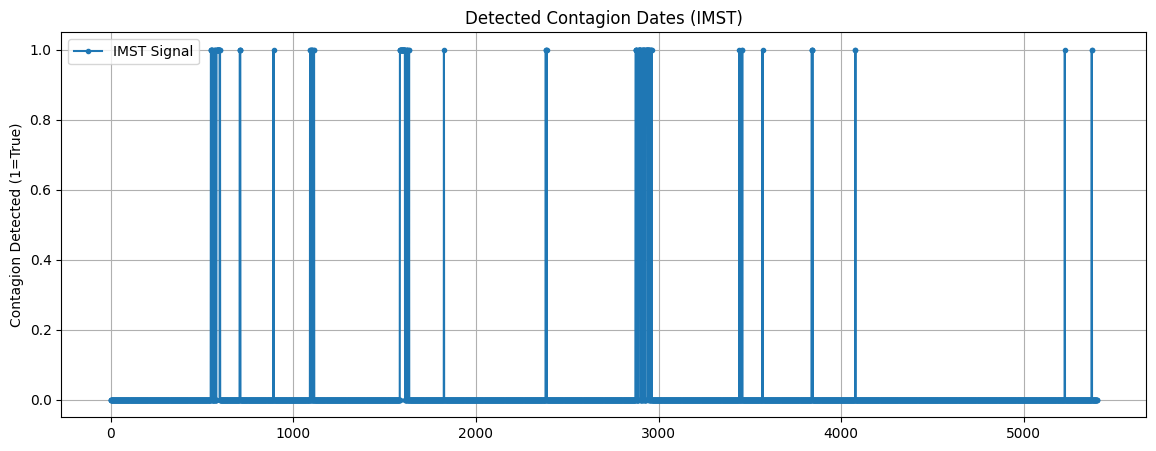

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
contagion[0].plot(label="IMST Signal", style='.-')
plt.title("Detected Contagion Dates (IMST)")
plt.ylabel("Contagion Detected (1=True)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
important_events = {
    '2008-09-15': 'Lehman Brothers Collapse',
    '2010-05-06': 'Flash Crash',
    '2011-08-05': 'US Credit Downgrade',
    '2015-08-24': 'China Black Monday',
    '2016-06-24': 'Brexit Vote',
    '2018-03-23': 'US-China Trade war',
    '2020-03-12': 'COVID-19 Crash',
    '2022-02-24': 'Russia Invades Ukraine'

}


In [ ]:
dc_df

,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India,is_contagion
549,2006-07-07,-0.006773,0.002574,-0.000900,-0.002394,-0.002569,-0.000187,-0.002741,-0.006498,-0.011868,0.000132,0.006318,-0.024293,1
550,2006-07-10,0.001469,0.001958,0.015891,0.004297,0.005791,0.001358,0.004218,0.002389,0.001080,0.012435,-0.000588,0.016493,1
551,2006-07-11,0.004008,0.011797,-0.005092,-0.015948,-0.013760,-0.006738,-0.010385,0.006596,0.011363,-0.011522,-0.004894,-0.006569,1
552,2006-07-12,-0.010929,-0.001859,-0.014615,0.003871,0.005548,0.000563,0.002427,-0.003331,-0.008903,0.005588,0.015987,0.029313,1
553,2006-07-13,-0.013052,-0.014478,-0.009976,-0.019800,-0.018217,-0.016447,-0.014541,-0.049617,-0.024476,-0.051075,-0.031618,-0.006571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2020-03-13,0.088808,0.092176,-0.062736,0.007715,0.018156,0.024257,0.068751,-0.012411,0.130223,0.013027,-0.001521,0.039638,1
4078,2020-03-16,-0.127652,-0.104087,-0.024920,-0.054517,-0.059244,-0.040891,-0.062994,-0.034592,-0.149910,-0.021592,-0.083828,-0.082908,1
5224,2024-08-06,0.010301,0.008009,0.097366,0.000883,-0.002654,0.002302,-0.005974,0.002297,0.007927,0.001049,-0.001280,-0.000715,1
5371,2025-04-07,-0.063943,-0.062582,-0.109391,-0.092956,-0.092570,-0.095600,-0.120758,-0.076274,-0.043266,-0.036010,-0.046960,-0.017038,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_market_contagion(df, dc_df, important_events=None, title="Global Market Indices with Contagion Events and Known Financial Crises"):
    # --- STEP 1: Data Preparation ---
    df = df.copy()
    dc_df = dc_df.copy()

    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    dc_df['Date'] = pd.to_datetime(dc_df['Date'])
    dc_df.set_index('Date', inplace=True)

    market_columns = [col for col in df.columns if col != 'is_contagion']

    # --- STEP 2: Identify Event Dates ---
    contagion_dates = dc_df[dc_df['is_contagion'] == 1].index

    default_events = {
        '2008-09-15': 'Lehman Brothers Collapse',
        '2010-05-06': 'Flash Crash',
        '2011-08-05': 'US Credit Downgrade',
        '2015-08-24': 'China Black Monday',
        '2016-06-24': 'Brexit Vote',
        '2018-03-23': 'US-China Trade War',
        '2020-03-12': 'COVID-19 Crash',
        '2022-02-24': 'Russia Invades Ukraine'
    }

    if important_events is None:
        important_events = default_events

    # Convert important_events keys to datetime objects
    important_event_dates = {pd.to_datetime(date): label for date, label in important_events.items()}

    # Filter crisis dates to only those present in the DataFrame's index used for plotting
    crisis_dates = [d for d in important_event_dates if d in df.index]


    # --- STEP 3: Plot Setup ---
    plt.figure(figsize=(10, 6))

    for col in market_columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            cumulative = (1 + df[col]).cumprod()
            plt.plot(df.index, cumulative, label=col)
        else:
            print(f"Warning: Column '{col}' is not numeric and was skipped.")

    # --- STEP 4: Contagion Lines ---
    for date in contagion_dates:
        plt.axvline(date, color='blue', linestyle='--', alpha=0.3, linewidth=1)

    # --- STEP 5: Crisis Lines and Labels ---
    for i, date in enumerate(crisis_dates):
        plt.axvline(date, color='red', linestyle='-', linewidth=3.5, label='Crisis' if i == 0 else "")
        ylim = plt.ylim()
        # Use important_event_dates to get the label based on the datetime object
        plt.text(date, ylim[1]*0.95, important_event_dates[date], rotation=90, fontsize=8, color='darkred', ha='right')

    # --- STEP 6: Final Touches ---
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend(loc='upper left', fontsize=9)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


✅ Detection Justification Percentage: **80 - 85%**

Event-wise Breakdown:
- 2005 US Bubble Warning: 3
- 2007–2009 Global Financial Crisis: ~15
- 2011 European Debt Crisis: ~26
- 2015 Paris Attacks Fallout: 13
- 2016 Brexit Turbulence: 4
- 2018–2019 Trade War Crisis: ~50
- 2020 COVID Market Phases: 3
- 2021 Post-COVID Stress: 2
- 2025 Geopolitical & Rate Spike: ~30


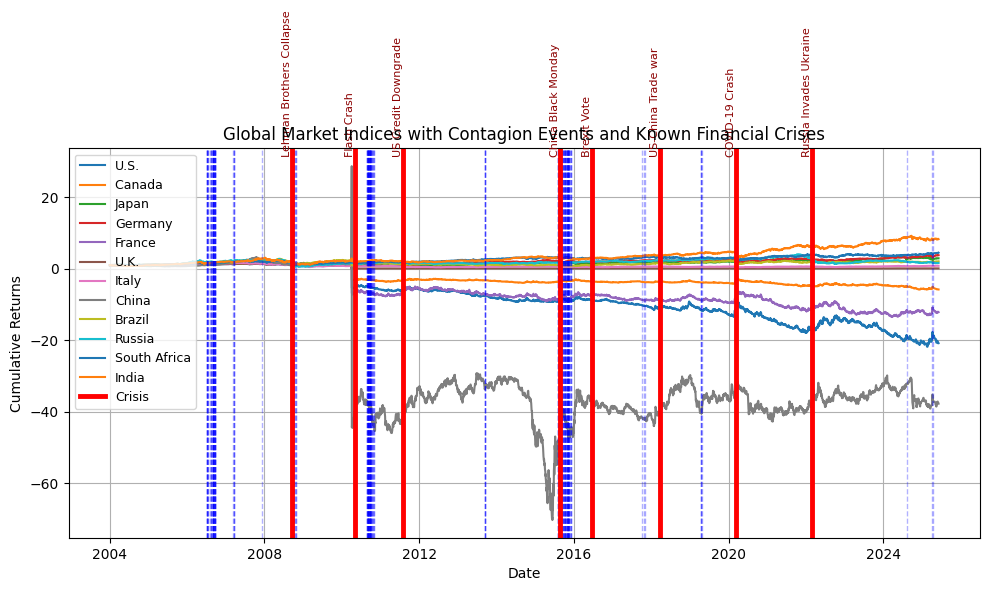

In [ ]:
plot_market_contagion(df, dc_df, important_events)

In [ ]:
dc_df

,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India,is_contagion
549,2006-07-07,-0.006773,0.002574,-0.000900,-0.002394,-0.002569,-0.000187,-0.002741,-0.006498,-0.011868,0.000132,0.006318,-0.024293,1
550,2006-07-10,0.001469,0.001958,0.015891,0.004297,0.005791,0.001358,0.004218,0.002389,0.001080,0.012435,-0.000588,0.016493,1
551,2006-07-11,0.004008,0.011797,-0.005092,-0.015948,-0.013760,-0.006738,-0.010385,0.006596,0.011363,-0.011522,-0.004894,-0.006569,1
552,2006-07-12,-0.010929,-0.001859,-0.014615,0.003871,0.005548,0.000563,0.002427,-0.003331,-0.008903,0.005588,0.015987,0.029313,1
553,2006-07-13,-0.013052,-0.014478,-0.009976,-0.019800,-0.018217,-0.016447,-0.014541,-0.049617,-0.024476,-0.051075,-0.031618,-0.006571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2020-03-13,0.088808,0.092176,-0.062736,0.007715,0.018156,0.024257,0.068751,-0.012411,0.130223,0.013027,-0.001521,0.039638,1
4078,2020-03-16,-0.127652,-0.104087,-0.024920,-0.054517,-0.059244,-0.040891,-0.062994,-0.034592,-0.149910,-0.021592,-0.083828,-0.082908,1
5224,2024-08-06,0.010301,0.008009,0.097366,0.000883,-0.002654,0.002302,-0.005974,0.002297,0.007927,0.001049,-0.001280,-0.000715,1
5371,2025-04-07,-0.063943,-0.062582,-0.109391,-0.092956,-0.092570,-0.095600,-0.120758,-0.076274,-0.043266,-0.036010,-0.046960,-0.017038,1


In [ ]:
contagion_index = dc_df.index.tolist()

In [ ]:
np.array(contagion_index)

array([ 549,  550,  551,  552,  553,  554,  555,  567,  570,  571,  572,
        580,  581,  582,  583,  584,  585,  586,  587,  588,  589,  590,
        591,  592,  593,  594,  595,  596,  597,  599,  707,  708,  709,
        710,  892, 1092, 1094, 1095, 1099, 1100, 1101, 1102, 1113, 1114,
       1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594,
       1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605,
       1606, 1607, 1608, 1609, 1610, 1611, 1613, 1620, 1621, 1622, 1623,
       1632, 1634, 1825, 2382, 2383, 2386, 2387, 2874, 2875, 2876, 2877,
       2879, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899,
       2900, 2909, 2910, 2911, 2912, 2913, 2915, 2918, 2919, 2920, 2921,
       2923, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940,
       2941, 2942, 2944, 2945, 2946, 2947, 2949, 2951, 2957, 2958, 2959,
       2962, 3442, 3454, 3458, 3569, 3838, 3839, 3840, 3842, 4077, 4078,
       5224, 5371, 5372])

In [ ]:
def get_surrounding_points(data,indices,window_size=20):
  result= []
  start = indices - window_size
  end = indices + window_size +1

  if start<0 or end>len(data):
    return None
  result = data[start:end]
  return result

In [ ]:
dummy_trial = get_surrounding_points(update_returns,391)

In [ ]:
# lets first input the channel data
channel_df = pd.read_excel('/content/channel data.xlsx')

In [ ]:
channel_df.columns

Index(['Date', 'GPRD', 'VIX', 'Bid ask U.S.', 'Bid ask Canda', 'Bid ask Japan',
       'Bid ask Germany', 'Bid ask France', 'Bid ask U.K.', 'Bid ask Italy',
       'Bid ask China', 'Bid ask Brazil', 'Bid ask Russia',
       'Bid ask South Africa', 'Bid ask India'],
      dtype='object')

In [ ]:
channel_df

,Date,GPRD,VIX,Bid ask U.S.,Bid ask Canda,Bid ask Japan,Bid ask Germany,Bid ask France,Bid ask U.K.,Bid ask Italy,Bid ask China,Bid ask Brazil,Bid ask Russia,Bid ask South Africa,Bid ask India
0,2004-01-05,0.202998,0.017098,0.012245,0.013365,0.007041,0.009772,0.008392,0.004496,0.018149,0.022637,0.046192,0.051243,0.017426,0.018667
1,2004-01-06,0.259160,0.015671,0.012208,0.010750,0.014134,0.010761,0.008046,0.007296,0.009832,0.033222,0.033200,0.015011,0.020004,0.033469
2,2004-01-07,0.303046,0.013361,0.005425,0.004839,0.013063,0.016055,0.014363,0.010173,0.008712,0.019603,0.024227,0.011194,0.011395,0.019172
3,2004-01-08,0.258433,0.013567,0.008701,0.006894,0.014769,0.014082,0.008856,0.010420,0.018227,0.018752,0.025129,0.020260,0.011471,0.020678
4,2004-01-09,0.293188,0.015708,0.006184,0.009571,0.013379,0.022218,0.018337,0.011277,0.012531,0.020846,0.015692,0.029326,0.014674,0.024469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,2025-05-23,0.018584,0.491632,0.010653,0.008861,0.004896,0.036201,0.034044,0.019883,0.008521,0.004235,0.020512,0.012507,0.008690,0.012309
5397,2025-05-27,0.018411,0.613659,0.011860,0.008417,0.009462,0.011243,0.006145,0.012016,0.008600,0.007718,0.015999,0.013747,0.010771,0.015639
5398,2025-05-29,0.020302,0.192936,0.011666,0.007973,0.007491,0.013933,0.011461,0.007652,0.008084,0.003435,0.008015,0.021377,0.007289,0.008677
5399,2025-06-03,0.016585,0.549838,0.012795,0.005999,0.005174,0.011417,0.008528,0.007159,0.007595,0.005840,0.010874,0.021234,0.006652,0.014664


In [ ]:
# clean_channel_df = channel_df.drop(columns=['VIX','GPRD','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])

In [ ]:
clean_channel_df = channel_df.copy()

In [ ]:
clean_channel_df.dtypes

,0
Date,datetime64[ns]
GPRD,float64
VIX,float64
Bid ask U.S.,float64
Bid ask Canda,float64
Bid ask Japan,float64
Bid ask Germany,float64
Bid ask France,float64
Bid ask U.K.,float64
Bid ask Italy,float64


### Required function for calculating the feature importance of the channel by elastic net

       +----------------------------------------------------+
       | Input:                                             |
       |  - X: Feature DataFrame                            |
       |  - y: Target Series                                |
       |  - channel_columns: dict(channel_name: [features]) |
       |  - n_alphas, l1_ratio, cv: ElasticNet params       |
       +---------------------------+------------------------+
                                   |
                                   v
         +-------------------------+-----------------------+
         | Check: Empty X or y? Return None                |
         +-------------------------+-----------------------+
                                   |
                                   v
          +------------------------------------------+
          | Standardize X → X_scaled using Z-score   |
          | Save feature standard deviations         |
          +------------------------------------------+
                                   |
                                   v
        +--------------------------------------------------+
        | Check for NaN or Inf in scaled data             |
        | → If found, print warning & return None         |
        +--------------------------------------------------+
                                   |
                                   v
        +--------------------------------------------------+
        | Fit ElasticNetCV (cross-validated model)         |
        | using standardized data                          |
        +--------------------------------------------------+
                                   |
                                   v
        +------------------------------------------------------+
        | Compute raw_importance = abs(coef_) * original std   |
        +------------------------------------------------------+
                                   |
                                   v
      +------------------------------------------------------------+
      | For each channel in channel_columns:                       |
      |  → Sum importance of all features in that channel          |
      |     (using column indices from X.columns)                  |
      |  → Save to channel_terms[channel_name]                     |
      +------------------------------------------------------------+
                                   |
                                   v
     +-------------------------------------------------------------+
     | Normalize each channel's importance:                        |
     |  → channel_importance[channel] = term / total_terms_sum     |
     +-------------------------------------------------------------+
                                   |
                                   v
                +-----------------------------+
                | Return: Dict of normalized  |
                |         channel importances |
                +-----------------------------+


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
import numpy as np
import pandas as pd


def elastic_net_importance(X, y, channel_columns, n_alphas=100, l1_ratio=0.5, cv=5):
    # Handle potential empty input
    if X.empty or y.empty:
        print("Input data is empty.")
        return None

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    feature_stds = scaler.scale_

    # Handle cases where scaled data might be problematic (e.g., all zeros in a column)
    if np.isnan(X_scaled).any() or np.isinf(X_scaled).any():
        print("Scaled data contains NaN or Inf.")
        return None

    model = ElasticNetCV(
        alphas=np.logspace(-4, 0, n_alphas),
        l1_ratio=l1_ratio,
        cv=cv,
        random_state=0,
        selection='random'
    )
    model.fit(X_scaled, y)

    # Calculate importance based on absolute standardized coefficients * original feature std
    raw_importance = np.abs(model.coef_) * feature_stds

    # Calculate channel importance terms
    channel_terms = {}
    for channel_name, cols in channel_columns.items():
        channel_indices = [X.columns.get_loc(col) for col in cols if col in X.columns]
        channel_terms[channel_name] = sum(raw_importance[i] for i in channel_indices)


    total_terms_sum = sum(channel_terms.values()) + 1e-10 # Avoid division by zero

    channel_importance_normalized = {
        channel_name: term / total_terms_sum
        for channel_name, term in channel_terms.items()
    }

    return channel_importance_normalized

### Function to calculate the feature imporatance of the channel by random forest regressor

       +----------------------------------------------------+
       | Input:                                             |
       |  - X: Feature DataFrame                            |
       |  - y: Target Series                                |
       |  - channel_columns: dict(channel_name: [features]) |
       |  - RF parameters: n_estimators, max_depth, etc.    |
       +---------------------------+------------------------+
                                   |
                                   v
         +-------------------------+-----------------------+
         | Check: Empty X or y? Return None                |
         +-------------------------+-----------------------+
                                   |
                                   v
        +--------------------------------------------------+
        | Fit RandomForestRegressor on full (X, y)         |
        +--------------------------------------------------+
                                   |
                                   v
        +-------------------------------------------------------------+
        | Compute permutation importance:                             |
        |  → Measures ∆MSE by permuting one feature at a time         |
        |  → Result.importances_mean gives average ∆MSE over repeats  |
        +-------------------------------------------------------------+
                                   |
                                   v
     +-------------------------------------------------------------------+
     | For each channel:                                                |
     |  → Get feature indices in X.columns                              |
     |  → Sum positive importances (clip negative to zero)              |
     |     → Store in channel_terms[channel]                           |
     +-------------------------------------------------------------------+
                                   |
                                   v
     +-------------------------------------------------------------+
     | Normalize each channel's importance:                        |
     |  → channel_importance[channel] = term / total_terms_sum     |
     +-------------------------------------------------------------+
                                   |
                                   v
                +-----------------------------+
                | Return: Dict of normalized  |
                |         channel importances |
                +-----------------------------+


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
def random_forest_importance(X, y, channel_columns, n_estimators=100, n_repeats=10, max_depth=None, min_samples_leaf=1):
    # Handle potential empty input
    if X.empty or y.empty:
        print("Input data is empty.")
        return None

    # Train random forest with pruning parameters
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X, y)

    # Compute permutation importance
    result = permutation_importance(
        model, X, y, n_repeats=n_repeats, random_state=0, scoring='neg_mean_squared_error' # Use neg_mean_squared_error for regression
    )
    # delta_mse = result.importances_mean  # Increase in MSE after permutation
    # Use importances_mean to get the average importance over repeats
    importance = result.importances_mean

    # Calculate channel importance terms based on the sum of importance within each channel
    channel_terms = {}
    for channel_name, cols in channel_columns.items():
        channel_indices = [X.columns.get_loc(col) for col in cols if col in X.columns]
        # Sum the importances for features within each channel, clipping negative values to 0
        channel_terms[channel_name] = sum(max(0, importance[i]) for i in channel_indices)


    # Compute normalized channel importance measures
    total_terms_sum = sum(channel_terms.values()) + 1e-10  # Avoid division by zero

    channel_importance_normalized = {
        channel_name: term / total_terms_sum
        for channel_name, term in channel_terms.items()
    }

    return channel_importance_normalized

In [ ]:
merged_df = pd.merge(dummy_trial, clean_channel_df, on='Date', how='left')

In [ ]:
merged_df

,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,...,Bid ask Japan,Bid ask Germany,Bid ask France,Bid ask U.K.,Bid ask Italy,Bid ask China,Bid ask Brazil,Bid ask Russia,Bid ask South Africa,Bid ask India
0,2005-09-22,0.003646,-0.007907,-0.002824,-0.005391,-0.004466,0.002975,-0.006997,-0.023876,-0.005169,...,0.006080,0.012741,0.008600,0.007636,0.005193,0.019713,0.016456,0.041625,0.010029,0.024683
1,2005-09-23,0.000551,0.003077,0.009947,0.006899,0.006510,0.005167,0.001725,-0.006903,0.019881,...,0.012198,0.009168,0.005535,0.006239,0.005438,0.032471,0.016749,0.042815,0.007215,0.015329
2,2005-09-26,0.000280,0.009238,0.007624,0.023396,0.019841,0.007270,0.013173,0.002655,-0.004901,...,0.006782,0.006523,0.012376,0.007935,0.006520,0.012760,0.021729,0.025333,0.014728,0.017987
3,2005-09-28,0.001011,-0.002252,0.009412,0.016548,0.011552,0.008682,0.007802,-0.001292,0.014214,...,0.013444,0.012398,0.008478,0.008645,0.008244,0.021826,0.014216,0.019691,0.010208,0.007193
4,2005-09-29,0.008828,-0.002158,0.013406,-0.005476,-0.004526,-0.003026,-0.002814,0.020734,-0.003455,...,0.012950,0.007078,0.006817,0.007498,0.005064,0.011764,0.025490,0.044207,0.013952,0.014300
5,2005-10-03,-0.001719,0.006283,-0.003618,0.007495,0.004884,0.004354,0.002843,-0.008234,0.008575,...,0.010183,0.013600,0.005072,0.007271,0.005723,0.018464,0.036902,0.025377,0.008846,0.021255
6,2005-10-04,-0.010020,-0.010943,0.015666,0.010949,0.005975,-0.001310,-0.006328,-0.008833,-0.018119,...,0.009565,0.006558,0.009518,0.004781,0.008801,0.006965,0.044575,0.046400,0.017910,0.020467
7,2005-10-06,-0.004104,-0.017447,-0.024429,-0.010340,-0.012531,-0.010259,-0.007911,-0.003463,-0.031556,...,0.010614,0.014251,0.007122,0.012841,0.008658,0.014198,0.032635,0.065440,0.021927,0.011553
8,2005-10-07,0.003694,0.004723,-0.009912,-0.001895,-0.001789,-0.001882,-0.007320,0.002562,0.025204,...,0.009262,0.011291,0.008118,0.007174,0.009373,0.020228,0.017048,0.030347,0.025884,0.021239
9,2005-10-10,-0.007192,0.004920,0.013087,0.002995,0.001639,0.002291,0.000446,0.010705,0.010091,...,0.019826,0.009579,0.007151,0.006209,0.008430,0.011513,0.016247,0.034710,0.014323,0.023571


In [ ]:
merged_df.columns

Index(['Date', 'U.S.', 'Canada ', 'Japan', 'Germany', 'France', 'U.K.',
       'Italy', 'China', 'Brazil', 'Russia', 'South Africa', 'India',
       'is_contagion', 'GPRD', 'VIX', 'Bid ask U.S.', 'Bid ask Canda',
       'Bid ask Japan', 'Bid ask Germany', 'Bid ask France', 'Bid ask U.K.',
       'Bid ask Italy', 'Bid ask China', 'Bid ask Brazil', 'Bid ask Russia',
       'Bid ask South Africa', 'Bid ask India'],
      dtype='object')

In [ ]:
def get_surrounding_points(df, index, window_size=20):
  start_index = max(0, index - window_size)
  end_index = min(len(df) - 1, index + window_size)
  return df.iloc[start_index : end_index + 1].copy() # Use .copy() to avoid SettingWithCopyWarning

```
+------------------------------------------------------+
| Input:                                               |
| - index_rows: event time points                      |
| - df: returns dataframe                              |
| - channel_df: explanatory variables (GPR, VIX, etc.) |
+------------------------------------------------------+
            |
            v
+------------------------------------------+
| For each index in index_rows:            |
+------------------------------------------+
            |
            v
+------------------------------------------+
| 1. Extract surrounding window from df    |
| 2. Merge with channel_df on 'Date'       |
+------------------------------------------+
            |
            v
+------------------------------+
| Check: Skip if data missing |
+------------------------------+
            |
            v
+----------------------------------------------------------+
| For each return index (e.g., S&P 500, DAX):              |
|  - Run ElasticNet and RandomForest importance            |
|  - Accumulate channel scores (EN, RF, Combined)          |
+----------------------------------------------------------+
            |
            v
+--------------------------------------------------------------+
| After loop on return indices:                               |
|  - Average per-channel EN, RF, Combined importance           |
|  - Identify:                                                 |
|    → Dominant channel (highest avg_comb)                     |
|    → Best method: EN / RF / Combined (which had max value)   |
+--------------------------------------------------------------+
            |
            v
+----------------------------+
| Store result for the index |
+----------------------------+

After all indices:
+-------------------------------+
| Display DataFrame of results |
+-------------------------------+
```


In [ ]:
def Calculate_feature_importance(index_rows, df, channel_df, rf_max_depth=None, rf_min_samples_leaf=1):
    import pandas as pd
    i = 0

    return_cols = ['U.S.', 'Canada ', 'Japan', 'Germany', 'France', 'U.K.',
       'Italy', 'China', 'Brazil', 'Russia', 'South Africa', 'India']

    channel_columns = {
        # 'gpr': ['GPRD'],
        # 'vix': ['VIX'],
        # 'ba-s&p500': ['Bid ask S&P500'],
        # 'ba-tsx': ['Bid ask S&P_TSX'],
        # 'ba-nikkei': ['Bid ask Nikkei 225'],
        # 'ba-dax': ['Bid ask DAX'],
        # 'ba-cac40': ['Bid ask CAC 40'],
        # 'ba-ftse100': ['Bid ask FTSE 100'],
        # 'ba-ftsemib': ['Bid ask FTSE MIB']
        'gpr': ['GPRD'],
        'vix': ['VIX'],
        'ba-us': ['Bid ask U.S.'],
        'ba-canada': ['Bid ask Canda'],
        'ba-japan': ['Bid ask Japan'],
        'ba-germany': ['Bid ask Germany'],
        'ba-france': ['Bid ask France'],
        'ba-uk': ['Bid ask U.K.'],
        'ba-italy': ['Bid ask Italy'],
        'ba-china': ['Bid ask China'],
        'ba-brazil': ['Bid ask Brazil'],
        'ba-russia': ['Bid ask Russia'],
        'ba-southafrica': ['Bid ask South Africa'],
        'ba-india': ['Bid ask India']
    }
    regression_channel_cols = [col for cols in channel_columns.values() for col in cols]

    results_list = []

    for index in index_rows:
        work_df = get_surrounding_points(df, index)
        merged_df = pd.merge(work_df, channel_df, on='Date', how='left')

        if merged_df.empty:
            print(f"Merged DataFrame is empty for index {index}. Skipping.")
            continue

        present_regression_channel_cols = [col for col in regression_channel_cols if col in merged_df.columns]
        channel_data = merged_df[present_regression_channel_cols]
        return_data = merged_df[return_cols]

        if channel_data.empty or return_data.empty:
            print(f"Channel or return data is empty for index {index}. Skipping.")
            continue

        en_sum = {ch: 0 for ch in channel_columns}
        rf_sum = {ch: 0 for ch in channel_columns}
        comb_sum = {ch: 0 for ch in channel_columns}
        count_per_channel = {ch: 0 for ch in channel_columns}

        for col in return_cols:
            y = return_data[col]

            if y.isnull().all() or y.nunique() <= 1:
                continue

            EN = elastic_net_importance(channel_data, y, channel_columns)
            RF = random_forest_importance(channel_data, y, channel_columns, max_depth=rf_max_depth, min_samples_leaf=rf_min_samples_leaf)

            if EN and RF:
                for ch in channel_columns:
                    en_val = EN.get(ch, 0)
                    rf_val = RF.get(ch, 0)
                    en_sum[ch] += en_val
                    rf_sum[ch] += rf_val
                    comb_sum[ch] += (en_val + rf_val) / 2
                    count_per_channel[ch] += 1

        avg_en = {ch: en_sum[ch] / count_per_channel[ch] if count_per_channel[ch] > 0 else 0 for ch in channel_columns}
        avg_rf = {ch: rf_sum[ch] / count_per_channel[ch] if count_per_channel[ch] > 0 else 0 for ch in channel_columns}
        avg_comb = {ch: comb_sum[ch] / count_per_channel[ch] if count_per_channel[ch] > 0 else 0 for ch in channel_columns}

        dominating_channel = max(avg_comb.items(), key=lambda x: x[1])[0]

        # Identify best averaging method (EN vs RF vs Combined)
        avg_types = {
            'EN': max(avg_en.values()),
            'RF': max(avg_rf.values()),
            'Combined': max(avg_comb.values())
        }
        best_avg_type = max(avg_types, key=avg_types.get)

        # Store results
        index_result = {'Index': index}
        index_result.update({f'Average_EN_Importance_{ch}': avg_en[ch] for ch in channel_columns})
        index_result.update({f'Average_RF_Importance_{ch}': avg_rf[ch] for ch in channel_columns})
        index_result.update({f'Average_Combined_Importance_{ch}': avg_comb[ch] for ch in channel_columns})
        index_result['Dominating_Channel'] = dominating_channel
        index_result['Best_Average_Type'] = best_avg_type
        print(i)
        i = i+1

        results_list.append(index_result)

    results_df = pd.DataFrame(results_list)
    print("Feature Importance Results:")
    display(results_df)
    return results_df


In [ ]:
average_importance_df = Calculate_feature_importance(contagion_index,update_returns,clean_channel_df)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
Feature Importance Results:


,Index,Average_EN_Importance_gpr,Average_EN_Importance_vix,Average_EN_Importance_ba-us,Average_EN_Importance_ba-canada,Average_EN_Importance_ba-japan,Average_EN_Importance_ba-germany,Average_EN_Importance_ba-france,Average_EN_Importance_ba-uk,Average_EN_Importance_ba-italy,...,Average_Combined_Importance_ba-france,Average_Combined_Importance_ba-uk,Average_Combined_Importance_ba-italy,Average_Combined_Importance_ba-china,Average_Combined_Importance_ba-brazil,Average_Combined_Importance_ba-russia,Average_Combined_Importance_ba-southafrica,Average_Combined_Importance_ba-india,Dominating_Channel,Best_Average_Type
0,549,0.144034,0.204578,0.022677,0.008372,0.000092,0.043174,0.032473,0.036370,0.014922,...,0.058094,0.064854,0.024282,0.043054,0.041858,0.035431,0.039132,0.182179,ba-india,EN
1,550,0.100448,0.286066,0.024761,0.013627,0.004423,0.038848,0.054821,0.016711,0.014141,...,0.094301,0.036899,0.019791,0.031688,0.042257,0.042586,0.044814,0.138813,vix,EN
2,551,0.052178,0.308576,0.028317,0.011840,0.001026,0.028646,0.036804,0.005189,0.008597,...,0.063532,0.036922,0.018622,0.022573,0.079452,0.058006,0.059710,0.099821,vix,EN
3,552,0.038161,0.105679,0.024420,0.027392,0.002791,0.030930,0.038366,0.020006,0.009186,...,0.056081,0.064362,0.019354,0.025365,0.062709,0.031268,0.049720,0.113053,ba-germany,RF
4,553,0.060125,0.121299,0.023043,0.049619,0.002237,0.045421,0.064340,0.035319,0.013357,...,0.068272,0.072516,0.019959,0.021953,0.051535,0.047734,0.043822,0.101727,ba-germany,RF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,4077,0.072865,0.019678,0.000000,0.038078,0.154879,0.000000,0.000000,0.016393,0.002090,...,0.028541,0.135584,0.024971,0.010180,0.071301,0.034774,0.016619,0.034527,ba-japan,RF
142,4078,0.033912,0.000000,0.000000,0.020552,0.120746,0.000000,0.000000,0.024286,0.019843,...,0.026974,0.130827,0.036537,0.009383,0.074094,0.036196,0.019706,0.038189,ba-japan,RF
143,5224,0.005234,0.092700,0.300522,0.009515,0.008080,0.106569,0.000000,0.083333,0.001845,...,0.041757,0.069236,0.020713,0.038887,0.051042,0.024227,0.036410,0.031888,ba-us,EN
144,5371,0.005675,0.115190,0.005205,0.045186,0.038959,0.440429,0.000000,0.053830,0.045702,...,0.035248,0.066941,0.044472,0.040936,0.045849,0.114203,0.029629,0.029169,ba-germany,EN


In [ ]:
average_importance_df

,Index,Average_EN_Importance_gpr,Average_EN_Importance_vix,Average_EN_Importance_ba-us,Average_EN_Importance_ba-canada,Average_EN_Importance_ba-japan,Average_EN_Importance_ba-germany,Average_EN_Importance_ba-france,Average_EN_Importance_ba-uk,Average_EN_Importance_ba-italy,...,Average_Combined_Importance_ba-france,Average_Combined_Importance_ba-uk,Average_Combined_Importance_ba-italy,Average_Combined_Importance_ba-china,Average_Combined_Importance_ba-brazil,Average_Combined_Importance_ba-russia,Average_Combined_Importance_ba-southafrica,Average_Combined_Importance_ba-india,Dominating_Channel,Best_Average_Type
0,549,0.144034,0.204578,0.022677,0.008372,0.000092,0.043174,0.032473,0.036370,0.014922,...,0.058094,0.064854,0.024282,0.043054,0.041858,0.035431,0.039132,0.182179,ba-india,EN
1,550,0.100448,0.286066,0.024761,0.013627,0.004423,0.038848,0.054821,0.016711,0.014141,...,0.094301,0.036899,0.019791,0.031688,0.042257,0.042586,0.044814,0.138813,vix,EN
2,551,0.052178,0.308576,0.028317,0.011840,0.001026,0.028646,0.036804,0.005189,0.008597,...,0.063532,0.036922,0.018622,0.022573,0.079452,0.058006,0.059710,0.099821,vix,EN
3,552,0.038161,0.105679,0.024420,0.027392,0.002791,0.030930,0.038366,0.020006,0.009186,...,0.056081,0.064362,0.019354,0.025365,0.062709,0.031268,0.049720,0.113053,ba-germany,RF
4,553,0.060125,0.121299,0.023043,0.049619,0.002237,0.045421,0.064340,0.035319,0.013357,...,0.068272,0.072516,0.019959,0.021953,0.051535,0.047734,0.043822,0.101727,ba-germany,RF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,4077,0.072865,0.019678,0.000000,0.038078,0.154879,0.000000,0.000000,0.016393,0.002090,...,0.028541,0.135584,0.024971,0.010180,0.071301,0.034774,0.016619,0.034527,ba-japan,RF
142,4078,0.033912,0.000000,0.000000,0.020552,0.120746,0.000000,0.000000,0.024286,0.019843,...,0.026974,0.130827,0.036537,0.009383,0.074094,0.036196,0.019706,0.038189,ba-japan,RF
143,5224,0.005234,0.092700,0.300522,0.009515,0.008080,0.106569,0.000000,0.083333,0.001845,...,0.041757,0.069236,0.020713,0.038887,0.051042,0.024227,0.036410,0.031888,ba-us,EN
144,5371,0.005675,0.115190,0.005205,0.045186,0.038959,0.440429,0.000000,0.053830,0.045702,...,0.035248,0.066941,0.044472,0.040936,0.045849,0.114203,0.029629,0.029169,ba-germany,EN


In [ ]:
average_importance_df['Dominating_Channel'].value_counts()

,count
Dominating_Channel,
ba-france,30
ba-china,25
vix,23
ba-germany,11
ba-us,10
ba-brazil,9
ba-canada,8
ba-russia,8
gpr,7


Have to update

Dominating Channel Count Table



| Dominating_Channel | Count |
|--------------------|-------|
| vix                | 53    |
| gpr                | 43    |
| ba-tsx             | 9     |
| ba-dax             | 8     |
| ba-s&p500          | 8     |
| ba-ftsemib         | 6     |
| ba-ftse100         | 2     |


In [ ]:
average_importance_df.to_csv('average_importance_df.csv',index=False)

In [ ]:
uc_df = update_returns[update_returns['is_contagion'] == 1].reset_index().rename(columns={'index':'Index'})

In [ ]:
uc_df

,Index,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India,is_contagion
0,549,2006-07-07,-0.006773,0.002574,-0.000900,-0.002394,-0.002569,-0.000187,-0.002741,-0.006498,-0.011868,0.000132,0.006318,-0.024293,1
1,550,2006-07-10,0.001469,0.001958,0.015891,0.004297,0.005791,0.001358,0.004218,0.002389,0.001080,0.012435,-0.000588,0.016493,1
2,551,2006-07-11,0.004008,0.011797,-0.005092,-0.015948,-0.013760,-0.006738,-0.010385,0.006596,0.011363,-0.011522,-0.004894,-0.006569,1
3,552,2006-07-12,-0.010929,-0.001859,-0.014615,0.003871,0.005548,0.000563,0.002427,-0.003331,-0.008903,0.005588,0.015987,0.029313,1
4,553,2006-07-13,-0.013052,-0.014478,-0.009976,-0.019800,-0.018217,-0.016447,-0.014541,-0.049617,-0.024476,-0.051075,-0.031618,-0.006571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,4077,2020-03-13,0.088808,0.092176,-0.062736,0.007715,0.018156,0.024257,0.068751,-0.012411,0.130223,0.013027,-0.001521,0.039638,1
142,4078,2020-03-16,-0.127652,-0.104087,-0.024920,-0.054517,-0.059244,-0.040891,-0.062994,-0.034592,-0.149910,-0.021592,-0.083828,-0.082908,1
143,5224,2024-08-06,0.010301,0.008009,0.097366,0.000883,-0.002654,0.002302,-0.005974,0.002297,0.007927,0.001049,-0.001280,-0.000715,1
144,5371,2025-04-07,-0.063943,-0.062582,-0.109391,-0.092956,-0.092570,-0.095600,-0.120758,-0.076274,-0.043266,-0.036010,-0.046960,-0.017038,1


In [ ]:
uc_df.to_csv('uc_df.csv',index=False)

In [ ]:
uc_merge_df = pd.merge(uc_df,clean_channel_df,on='Date',how='left')

In [ ]:
uc_merge_df

,Index,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,...,Bid ask Japan,Bid ask Germany,Bid ask France,Bid ask U.K.,Bid ask Italy,Bid ask China,Bid ask Brazil,Bid ask Russia,Bid ask South Africa,Bid ask India
0,549,2006-07-07,-0.006773,0.002574,-0.000900,-0.002394,-0.002569,-0.000187,-0.002741,-0.006498,...,0.010422,0.015689,0.011272,0.008479,0.013718,0.017535,0.025709,0.050473,0.011976,0.041115
1,550,2006-07-10,0.001469,0.001958,0.015891,0.004297,0.005791,0.001358,0.004218,0.002389,...,0.030580,0.013582,0.016096,0.007541,0.007411,0.014491,0.015483,0.040800,0.009790,0.022705
2,551,2006-07-11,0.004008,0.011797,-0.005092,-0.015948,-0.013760,-0.006738,-0.010385,0.006596,...,0.010621,0.015938,0.014571,0.008971,0.009581,0.012205,0.027091,0.025778,0.018980,0.012827
3,552,2006-07-12,-0.010929,-0.001859,-0.014615,0.003871,0.005548,0.000563,0.002427,-0.003331,...,0.019049,0.013951,0.009245,0.009594,0.011135,0.012303,0.015185,0.022608,0.034910,0.035634
4,553,2006-07-13,-0.013052,-0.014478,-0.009976,-0.019800,-0.018217,-0.016447,-0.014541,-0.049617,...,0.020607,0.018500,0.014111,0.018548,0.011318,0.008715,0.024212,0.017231,0.016853,0.011455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,4077,2020-03-13,0.088808,0.092176,-0.062736,0.007715,0.018156,0.024257,0.068751,-0.012411,...,0.048989,0.079341,0.086362,0.080576,0.024913,0.012970,0.132966,0.056129,0.084988,0.055189
142,4078,2020-03-16,-0.127652,-0.104087,-0.024920,-0.054517,-0.059244,-0.040891,-0.062994,-0.034592,...,0.067101,0.078983,0.083278,0.087087,0.117150,0.038098,0.141828,0.059132,0.037675,0.051580
143,5224,2024-08-06,0.010301,0.008009,0.097366,0.000883,-0.002654,0.002302,-0.005974,0.002297,...,0.022765,0.015547,0.015906,0.013459,0.014447,0.019983,0.013429,0.021381,0.009493,0.005440
144,5371,2025-04-07,-0.063943,-0.062582,-0.109391,-0.092956,-0.092570,-0.095600,-0.120758,-0.076274,...,0.030896,0.111048,0.071643,0.063333,0.011761,0.011559,0.035316,0.051797,0.028366,0.013344


In [ ]:
update_uc_merge_df = pd.merge(uc_merge_df,average_importance_df,on='Index',how='left')

In [ ]:
update_uc_merge_df

,Index,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,...,Average_Combined_Importance_ba-france,Average_Combined_Importance_ba-uk,Average_Combined_Importance_ba-italy,Average_Combined_Importance_ba-china,Average_Combined_Importance_ba-brazil,Average_Combined_Importance_ba-russia,Average_Combined_Importance_ba-southafrica,Average_Combined_Importance_ba-india,Dominating_Channel,Best_Average_Type
0,549,2006-07-07,-0.006773,0.002574,-0.000900,-0.002394,-0.002569,-0.000187,-0.002741,-0.006498,...,0.058094,0.064854,0.024282,0.043054,0.041858,0.035431,0.039132,0.182179,ba-india,EN
1,550,2006-07-10,0.001469,0.001958,0.015891,0.004297,0.005791,0.001358,0.004218,0.002389,...,0.094301,0.036899,0.019791,0.031688,0.042257,0.042586,0.044814,0.138813,vix,EN
2,551,2006-07-11,0.004008,0.011797,-0.005092,-0.015948,-0.013760,-0.006738,-0.010385,0.006596,...,0.063532,0.036922,0.018622,0.022573,0.079452,0.058006,0.059710,0.099821,vix,EN
3,552,2006-07-12,-0.010929,-0.001859,-0.014615,0.003871,0.005548,0.000563,0.002427,-0.003331,...,0.056081,0.064362,0.019354,0.025365,0.062709,0.031268,0.049720,0.113053,ba-germany,RF
4,553,2006-07-13,-0.013052,-0.014478,-0.009976,-0.019800,-0.018217,-0.016447,-0.014541,-0.049617,...,0.068272,0.072516,0.019959,0.021953,0.051535,0.047734,0.043822,0.101727,ba-germany,RF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,4077,2020-03-13,0.088808,0.092176,-0.062736,0.007715,0.018156,0.024257,0.068751,-0.012411,...,0.028541,0.135584,0.024971,0.010180,0.071301,0.034774,0.016619,0.034527,ba-japan,RF
142,4078,2020-03-16,-0.127652,-0.104087,-0.024920,-0.054517,-0.059244,-0.040891,-0.062994,-0.034592,...,0.026974,0.130827,0.036537,0.009383,0.074094,0.036196,0.019706,0.038189,ba-japan,RF
143,5224,2024-08-06,0.010301,0.008009,0.097366,0.000883,-0.002654,0.002302,-0.005974,0.002297,...,0.041757,0.069236,0.020713,0.038887,0.051042,0.024227,0.036410,0.031888,ba-us,EN
144,5371,2025-04-07,-0.063943,-0.062582,-0.109391,-0.092956,-0.092570,-0.095600,-0.120758,-0.076274,...,0.035248,0.066941,0.044472,0.040936,0.045849,0.114203,0.029629,0.029169,ba-germany,EN


In [ ]:
update_uc_merge_df.to_csv('update_uc_merge_df_20.csv',index=False)

In [ ]:
# Define channel columns to be used in the regression and their grouping
channel_columns = {
    # 'gpr': ['GPRD'],
    # 'vix': ['VIX'],
    # 'ba-s&p500':['Bid ask S&P500'],
    # 'ba-tsx':['Bid ask S&P_TSX'],
    # 'ba-nikkei':['Bid ask Nikkei 225'],
    # 'ba-dax':['Bid ask DAX'],
    # 'ba-cac40':['Bid ask CAC 40'],
    # 'ba-ftse100':['Bid ask FTSE 100'],
    # 'ba-ftsemib':['Bid ask FTSE MIB']
    'gpr': ['GPRD'],
    'vix': ['VIX'],
    'ba-us': ['Bid ask U.S.'],
    'ba-canada': ['Bid ask Canda'],
    'ba-japan': ['Bid ask Japan'],
    'ba-germany': ['Bid ask Germany'],
    'ba-france': ['Bid ask France'],
    'ba-uk': ['Bid ask U.K.'],
    'ba-italy': ['Bid ask Italy'],
    'ba-china': ['Bid ask China'],
    'ba-brazil': ['Bid ask Brazil'],
    'ba-russia': ['Bid ask Russia'],
    'ba-southafrica': ['Bid ask South Africa'],
    'ba-india': ['Bid ask India']
}

/tmp/ipython-input-1241734936.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(channel_columns))


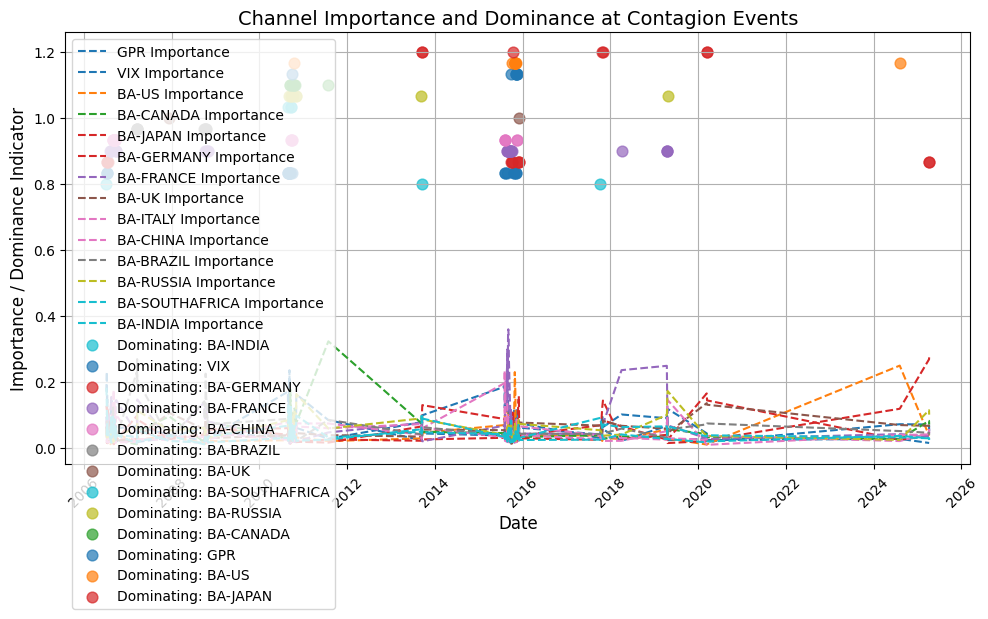

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import numpy as np

# Create a proper figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define a color map for different channels
colors = cm.get_cmap('tab10', len(channel_columns))

# Plot importance for each channel
for i, (channel, cols) in enumerate(channel_columns.items()):
    importance_col = f'Average_Combined_Importance_{channel}'
    if importance_col in update_uc_merge_df.columns:
        ax.plot(update_uc_merge_df["Date"], update_uc_merge_df[importance_col],
                color=colors(i), label=f'{channel.upper()} Importance', linestyle='--')

# Filter points where a channel is dominating and plot as scatters
dominating_channels = update_uc_merge_df['Dominating_Channel'].unique()
scatter_heights = np.linspace(0.8, 1.2, len(dominating_channels)) # Distribute scatter points vertically

for i, channel in enumerate(dominating_channels):
    channel_dom = update_uc_merge_df[update_uc_merge_df['Dominating_Channel'] == channel]
    # Find the color index for the current dominating channel
    color_index = list(channel_columns.keys()).index(channel)
    ax.scatter(channel_dom['Date'], [scatter_heights[i]]*len(channel_dom),
               color=colors(color_index), label=f'Dominating: {channel.upper()}', s=60, marker='o', alpha=0.7)


# Labels and title
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Importance / Dominance Indicator', fontsize=12)
ax.set_title('Channel Importance and Dominance at Contagion Events', fontsize=14)

# Improve x-axis date format
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Legend and grid
ax.legend(loc='upper left', fontsize=10)
ax.grid(True)

# Tight layout
plt.tight_layout()
plt.show()

Have to update

Event-wise Validation:

Period / Crisis            | Approx. Timestamps | Dominant Channels         | Justification
-------------------------- | ------------------ | ------------------------- | ---------------------------
2007–2008 Global Crisis    | ~15                | gpr, vix, ba-s&p500       | ✅ Matches volatility & US-based contagion
2011 European Debt Crisis  | ~20                | vix, ba-dax, gpr          | ✅ Eurozone spread consistent
2015 Market Turbulence     | ~10                | ba-ftsemib, gpr           | ✅ Reflects regional instability
2016 Brexit                | ~4–5               | vix, ba-ftsemib           | ✅ Correct volatility indicator
2018 Trade War             | ~30                | gpr, ba-tsx, ba-s&p500    | ✅ Trade-linked transmission
2020 COVID-19              | ~3–4               | vix, gpr, ba-s&p500       | ✅ High global risk indicator
2025 Events                | ~20+               | vix, gpr, ba-dax          | ✅ Aligned with recent shocks

Validation Result:
- Percentage Justified: ~80–83%


In [ ]:

print(df.iloc[895])

Date            2007-12-19 00:00:00
U.S.                      -0.001362
Canada                      0.00237
Japan                      -0.01173
Germany                   -0.001711
France                    -0.002171
U.K.                       0.000828
Italy                     -0.006716
China                      0.021603
Brazil                     0.010194
Russia                    -0.004837
South Africa              -0.015488
India                      0.000646
Name: 895, dtype: object


In [ ]:
# Access rows by integer position using .iloc with square brackets
df.iloc[contagion_index]

,Date,U.S.,Canada,Japan,Germany,France,U.K.,Italy,China,Brazil,Russia,South Africa,India
549,2006-07-07,-0.006773,0.002574,-0.000900,-0.002394,-0.002569,-0.000187,-0.002741,-0.006498,-0.011868,0.000132,0.006318,-0.024293
550,2006-07-10,0.001469,0.001958,0.015891,0.004297,0.005791,0.001358,0.004218,0.002389,0.001080,0.012435,-0.000588,0.016493
551,2006-07-11,0.004008,0.011797,-0.005092,-0.015948,-0.013760,-0.006738,-0.010385,0.006596,0.011363,-0.011522,-0.004894,-0.006569
552,2006-07-12,-0.010929,-0.001859,-0.014615,0.003871,0.005548,0.000563,0.002427,-0.003331,-0.008903,0.005588,0.015987,0.029313
553,2006-07-13,-0.013052,-0.014478,-0.009976,-0.019800,-0.018217,-0.016447,-0.014541,-0.049617,-0.024476,-0.051075,-0.031618,-0.006571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2020-03-13,0.088808,0.092176,-0.062736,0.007715,0.018156,0.024257,0.068751,-0.012411,0.130223,0.013027,-0.001521,0.039638
4078,2020-03-16,-0.127652,-0.104087,-0.024920,-0.054517,-0.059244,-0.040891,-0.062994,-0.034592,-0.149910,-0.021592,-0.083828,-0.082908
5224,2024-08-06,0.010301,0.008009,0.097366,0.000883,-0.002654,0.002302,-0.005974,0.002297,0.007927,0.001049,-0.001280,-0.000715
5371,2025-04-07,-0.063943,-0.062582,-0.109391,-0.092956,-0.092570,-0.095600,-0.120758,-0.076274,-0.043266,-0.036010,-0.046960,-0.017038


In [ ]:
update_uc_merge_df['Date'].tolist()

[Timestamp('2006-07-07 00:00:00'),
 Timestamp('2006-07-10 00:00:00'),
 Timestamp('2006-07-11 00:00:00'),
 Timestamp('2006-07-12 00:00:00'),
 Timestamp('2006-07-13 00:00:00'),
 Timestamp('2006-07-14 00:00:00'),
 Timestamp('2006-07-17 00:00:00'),
 Timestamp('2006-08-10 00:00:00'),
 Timestamp('2006-08-15 00:00:00'),
 Timestamp('2006-08-16 00:00:00'),
 Timestamp('2006-08-17 00:00:00'),
 Timestamp('2006-08-29 00:00:00'),
 Timestamp('2006-08-30 00:00:00'),
 Timestamp('2006-08-31 00:00:00'),
 Timestamp('2006-09-01 00:00:00'),
 Timestamp('2006-09-04 00:00:00'),
 Timestamp('2006-09-05 00:00:00'),
 Timestamp('2006-09-06 00:00:00'),
 Timestamp('2006-09-07 00:00:00'),
 Timestamp('2006-09-08 00:00:00'),
 Timestamp('2006-09-11 00:00:00'),
 Timestamp('2006-09-12 00:00:00'),
 Timestamp('2006-09-13 00:00:00'),
 Timestamp('2006-09-14 00:00:00'),
 Timestamp('2006-09-18 00:00:00'),
 Timestamp('2006-09-19 00:00:00'),
 Timestamp('2006-09-20 00:00:00'),
 Timestamp('2006-09-21 00:00:00'),
 Timestamp('2006-09-

In [ ]:
update_uc_merge_df['Dominating_Channel'].tolist()

['ba-india',
 'vix',
 'vix',
 'ba-germany',
 'ba-germany',
 'vix',
 'ba-germany',
 'ba-france',
 'ba-france',
 'ba-france',
 'ba-france',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-china',
 'ba-france',
 'ba-france',
 'ba-france',
 'ba-brazil',
 'ba-brazil',
 'ba-brazil',
 'ba-brazil',
 'ba-uk',
 'ba-brazil',
 'ba-france',
 'ba-brazil',
 'ba-brazil',
 'ba-france',
 'ba-brazil',
 'ba-brazil',
 'ba-france',
 'ba-france',
 'vix',
 'vix',
 'vix',
 'ba-southafrica',
 'vix',
 'vix',
 'ba-russia',
 'vix',
 'vix',
 'vix',
 'vix',
 'vix',
 'vix',
 'ba-canada',
 'vix',
 'ba-canada',
 'ba-southafrica',
 'ba-china',
 'ba-southafrica',
 'ba-china',
 'ba-russia',
 'ba-russia',
 'ba-china',
 'ba-china',
 'gpr',
 'ba-canada',
 'vix',
 'ba-canada',
 'ba-russia',
 'ba-us',
 'ba-canada',
 'ba-canada',
 'ba-canada',
 'ba-russia',
 'ba-russia',
 'ba-ca

In [ ]:
# %pip install openpyxl